# Import de modules généraux


In [1]:
from __future__ import division

import pandas
import seaborn


# Import de modules spécifiques à Openfisca

In [2]:
from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_bar
from openfisca_france_indirect_taxation.surveys import SurveyScenario


# Import d'une nouvelle palette de couleurs

In [3]:
seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline

# Sélection des variables pour la simulation

In [4]:
simulated_variables = [
    'tva_taux_plein',
    'tva_taux_intermediaire',
    'tva_taux_reduit',
    'tva_taux_super_reduit',
    'rev_disponible',
    ]


# Calcul de la part de chaque type de TVA dans le revenu disponible des ménages, par décile de revenu

 Part de chaque type de TVA dans le revenu disponible des ménages pour l'année 2000 


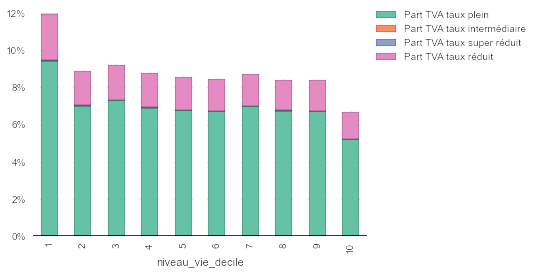

 Part de chaque type de TVA dans le revenu disponible des ménages pour l'année 2005 


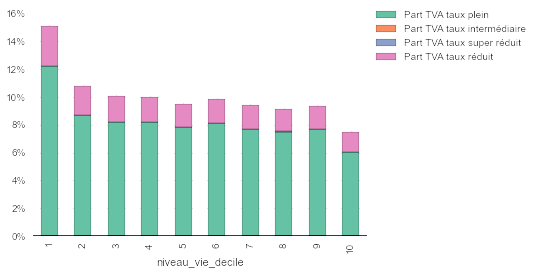

 Part de chaque type de TVA dans le revenu disponible des ménages pour l'année 2011 


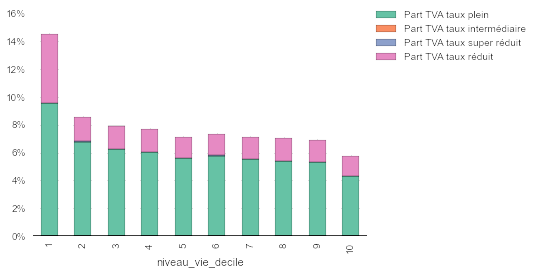

In [5]:
for year in [2000, 2005, 2011]:
    survey_scenario = SurveyScenario.create(year = year)
    pivot_table = pandas.DataFrame()
    for values in simulated_variables:
        pivot_table = pandas.concat([
            pivot_table,
            survey_scenario.compute_pivot_table(values = [values], columns = ['niveau_vie_decile'])
            ])
    taxes_indirectes = pivot_table.T

    taxes_indirectes[u'Part TVA taux super réduit'] = \
        taxes_indirectes['tva_taux_super_reduit'] / taxes_indirectes['rev_disponible']
    taxes_indirectes[u'Part TVA taux réduit'] = \
        taxes_indirectes['tva_taux_reduit'] / taxes_indirectes['rev_disponible']
    taxes_indirectes[u'Part TVA taux intermédiaire'] = \
        taxes_indirectes['tva_taux_intermediaire'] / taxes_indirectes['rev_disponible']
    taxes_indirectes[u'Part TVA taux plein'] = \
        taxes_indirectes['tva_taux_plein'] / taxes_indirectes['rev_disponible']

    df_to_graph = taxes_indirectes[[u'Part TVA taux plein', u'Part TVA taux intermédiaire',
        u'Part TVA taux super réduit', u'Part TVA taux réduit']]

    print ''' Part de chaque type de TVA dans le revenu disponible des ménages pour l'année {} '''.format(year)
    graph_builder_bar(df_to_graph)
